In [1]:
import numpy as np
import pandas as pd 

In [4]:
df = pd.read_csv('drug200.csv')

In [5]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


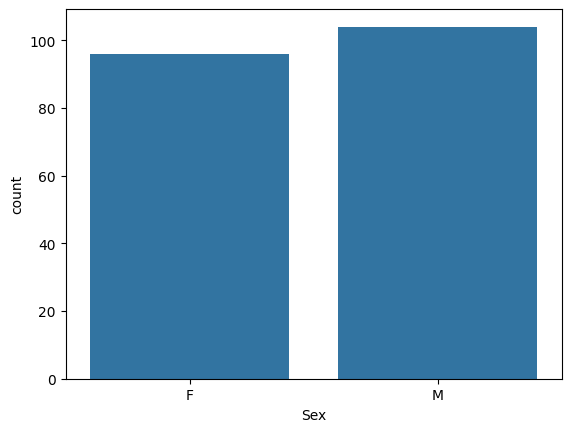

In [18]:
x = df.Sex.value_counts()
print(x)
p =sns.countplot(data = df, x = 'Sex')
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


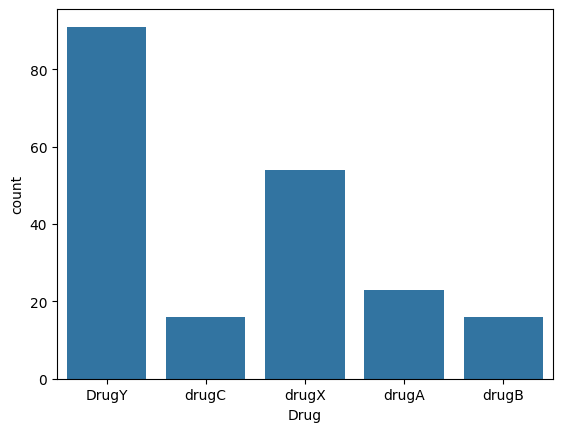

In [31]:
x = df.Drug.value_counts()
print(x)
p =sns.countplot(data = df, x = 'Drug')
plt.show()

In [32]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

C:\Windows\Temp\ipykernel_21108\78083273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug'] == 'drugY']['Age'], color= 'green')
C:\Users\prave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Windows\Temp\ipykernel_21108\78083273.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (

<Axes: xlabel='Age', ylabel='Density'>

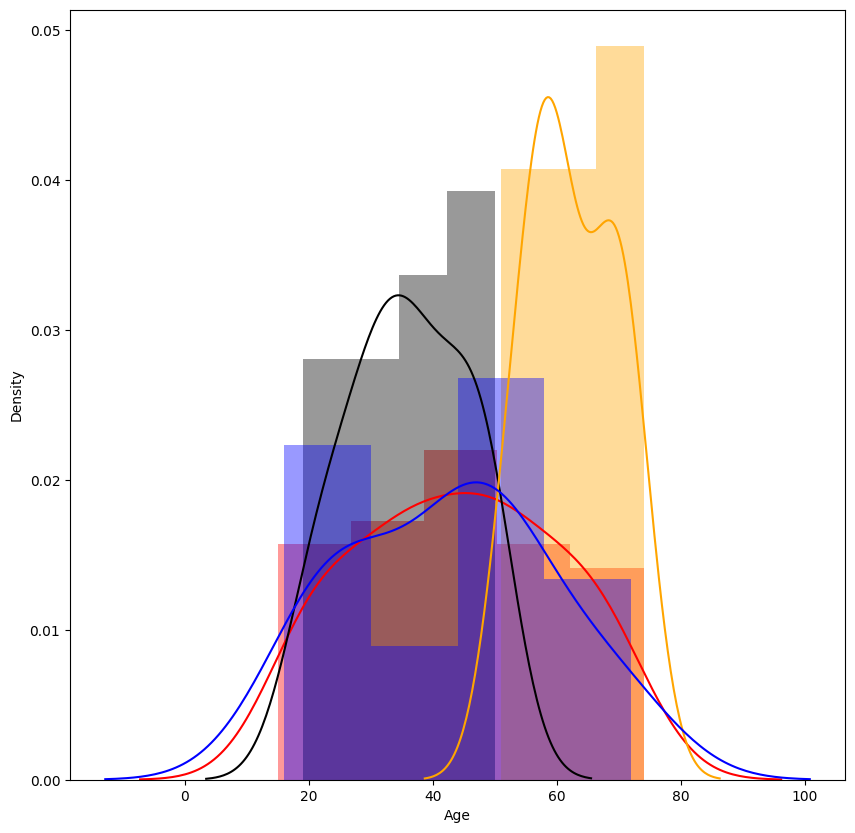

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['Drug'] == 'drugY']['Age'], color= 'green')
sns.distplot(df[df['Drug'] == 'drugX']['Age'], color= 'red')
sns.distplot(df[df['Drug'] == 'drugA']['Age'], color= 'black')
sns.distplot(df[df['Drug'] == 'drugB']['Age'], color= 'orange')
sns.distplot(df[df['Drug'] == 'drugC']['Age'], color= 'blue')

C:\Windows\Temp\ipykernel_21108\3312858514.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug'] == 'drugY']['Age'], color='green', hist=False, label='drugY')
C:\Windows\Temp\ipykernel_21108\3312858514.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug'

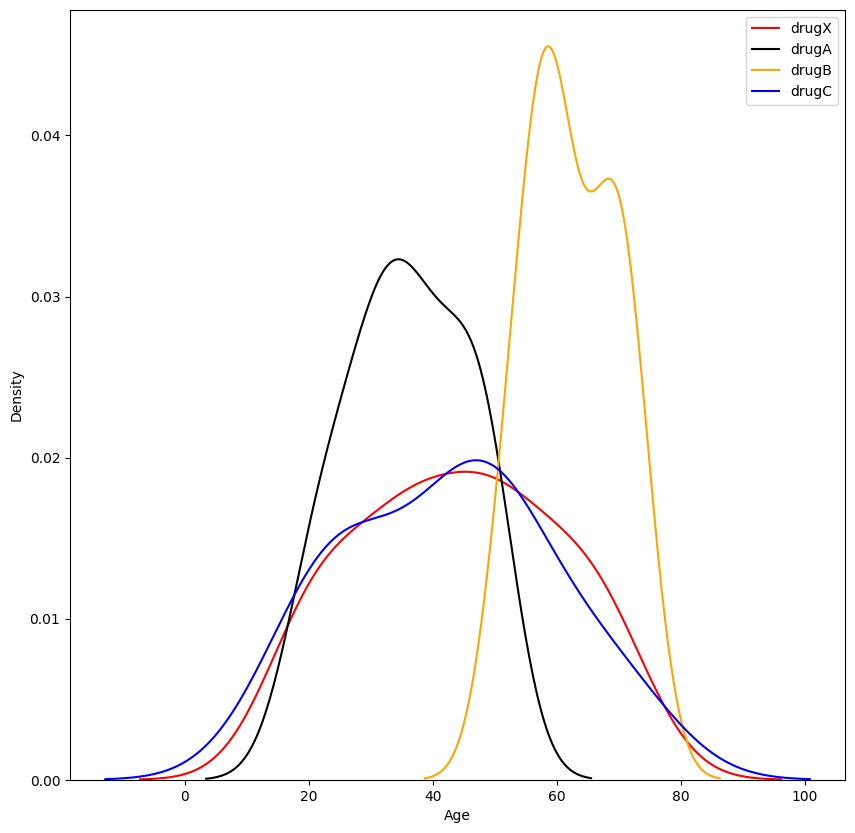

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

sns.distplot(df[df['Drug'] == 'drugY']['Age'], color='green', hist=False, label='drugY')
sns.distplot(df[df['Drug'] == 'drugX']['Age'], color='red', hist=False, label='drugX')
sns.distplot(df[df['Drug'] == 'drugA']['Age'], color='black', hist=False, label='drugA')
sns.distplot(df[df['Drug'] == 'drugB']['Age'], color='orange', hist=False, label='drugB')
sns.distplot(df[df['Drug'] == 'drugC']['Age'], color='blue', hist=False, label='drugC')

plt.legend()

plt.show()


In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['BP'] = oe.fit_transform(df[['BP']])
df['Sex'] = oe.fit_transform(df[['Sex']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])

In [43]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_BP
0,23,0.0,0.0,0.0,25.355,0.0,FHIGH
1,47,1.0,1.0,0.0,13.093,3.0,MLOW
2,47,1.0,1.0,0.0,10.114,3.0,MLOW
3,28,0.0,2.0,0.0,7.798,4.0,FNORMAL
4,61,0.0,1.0,0.0,18.043,0.0,FLOW
...,...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0,FLOW
196,16,1.0,1.0,0.0,12.006,3.0,MLOW
197,52,1.0,2.0,0.0,9.894,4.0,MNORMAL
198,23,1.0,2.0,1.0,14.020,4.0,MNORMAL


In [65]:
df.drop(columns= 'Sex_BP', inplace = True)

In [66]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [67]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [68]:
y

0      0.0
1      3.0
2      3.0
3      4.0
4      0.0
      ... 
195    3.0
196    3.0
197    4.0
198    4.0
199    4.0
Name: Drug, Length: 200, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
 X_train

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
79,32,0.0,1.0,1.0,10.840,4.0
197,52,1.0,2.0,0.0,9.894,4.0
38,39,0.0,2.0,1.0,9.709,4.0
24,33,0.0,1.0,0.0,33.486,0.0
122,34,1.0,2.0,0.0,22.456,0.0
...,...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953,4.0
14,50,0.0,2.0,0.0,12.703,4.0
92,29,0.0,0.0,0.0,29.450,0.0
179,67,0.0,2.0,0.0,15.891,0.0


In [71]:
y_train

79     4.0
197    4.0
38     4.0
24     0.0
122    0.0
      ... 
106    4.0
14     4.0
92     0.0
179    0.0
102    3.0
Name: Drug, Length: 160, dtype: float64

In [73]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state =0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [74]:
y_pred_gini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini, y_test))

1.0


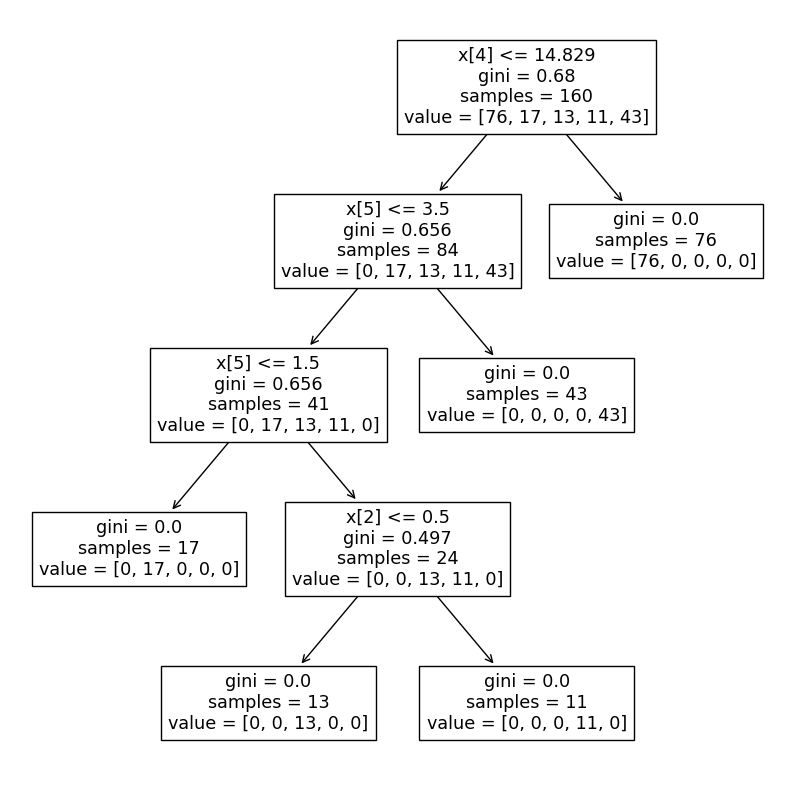

In [77]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()